In [1]:
'''MobileNet in PyTorch.
See the paper "MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications"
for more details.
'''
import torch
import torch.nn as nn
import torch.nn.functional as F
# Set seed for PyTorch (CPU & CUDA)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)  # For multi-GPU

from mobilenet import MobileNet
from data import get_train_valid_loader, get_test_loader

In [2]:
def train_func(model, optimizer, criterion, train_loader, device, epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total

    return train_loss, train_accuracy

def eval(model, criterion, test_loader, device):
    # Evaluate the model on the validation set
    model.eval()
    valid_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    valid_loss = valid_loss / len(valid_loader)
    valid_accuracy = 100 * correct / total

    return valid_loss, valid_accuracy


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Running experiment with learning rate: 0.2
Epoch [1/15], Train Loss: 4.6542, Train Acc: 1.71%, Valid Loss: 4.4168, Valid Acc: 3.14%
Epoch [2/15], Train Loss: 4.0004, Train Acc: 6.59%, Valid Loss: 3.7997, Valid Acc: 9.44%
Epoch [3/15], Train Loss: 3.6467, Train Acc: 12.26%, Valid Loss: 3.6451, Valid Acc: 12.55%
Epoch [4/15], Train Loss: 3.3658, Train Acc: 16.84%, Valid Loss: 3.4100, Valid Acc: 17.05%
Epoch [5/15], Train Loss: 3.1231, Train Acc: 21.34%, Valid Loss: 3.0363, Valid Acc: 23.16%
Epoch [6/15], Train Loss: 2.8939, Train Acc: 25.43%, Valid Loss: 2.8683, Valid Acc: 27.52%
Epoch [7/15], Train Loss: 2.6931, Train Acc: 29.50%, Valid Loss: 2.7010, Valid Acc: 29.97%
Epoch [8/15], Train Loss: 2.5447, Train Acc: 32.46%, Valid Loss: 2.5970, Valid Acc: 33.01%
Epoch [9/15], Train Loss: 2.4133, Train Acc: 35.25%, Valid Loss: 2.3560, Valid Acc: 37.57%
Epoch [10/15], Train Loss: 2

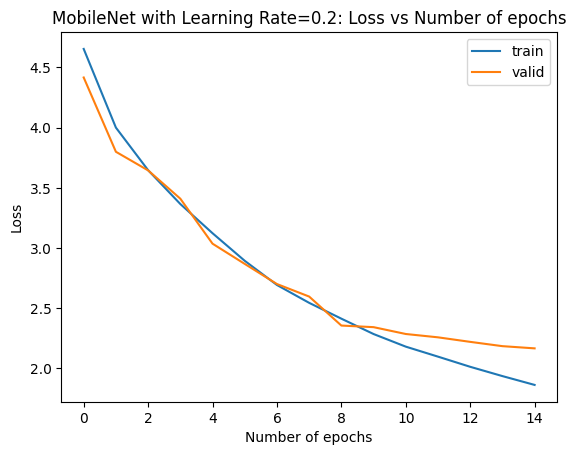

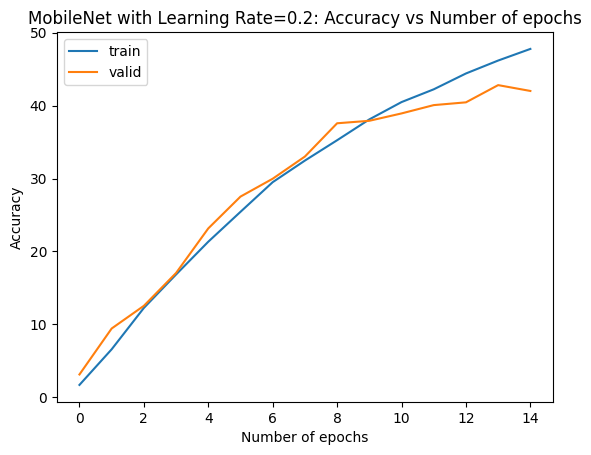

Running experiment with learning rate: 0.05
Epoch [1/15], Train Loss: 4.1899, Train Acc: 5.73%, Valid Loss: 3.8032, Valid Acc: 10.07%
Epoch [2/15], Train Loss: 3.5632, Train Acc: 14.07%, Valid Loss: 3.2655, Valid Acc: 18.82%
Epoch [3/15], Train Loss: 3.1750, Train Acc: 20.62%, Valid Loss: 2.9600, Valid Acc: 25.26%
Epoch [4/15], Train Loss: 2.8603, Train Acc: 26.44%, Valid Loss: 2.7237, Valid Acc: 30.26%
Epoch [5/15], Train Loss: 2.6241, Train Acc: 31.16%, Valid Loss: 2.5506, Valid Acc: 33.40%
Epoch [6/15], Train Loss: 2.4439, Train Acc: 34.90%, Valid Loss: 2.4067, Valid Acc: 36.22%
Epoch [7/15], Train Loss: 2.2912, Train Acc: 38.13%, Valid Loss: 2.4555, Valid Acc: 35.90%
Epoch [8/15], Train Loss: 2.1647, Train Acc: 41.07%, Valid Loss: 2.2577, Valid Acc: 39.96%
Epoch [9/15], Train Loss: 2.0519, Train Acc: 43.41%, Valid Loss: 2.1089, Valid Acc: 43.09%
Epoch [10/15], Train Loss: 1.9525, Train Acc: 45.98%, Valid Loss: 2.0964, Valid Acc: 43.87%
Epoch [11/15], Train Loss: 1.8626, Train Acc: 

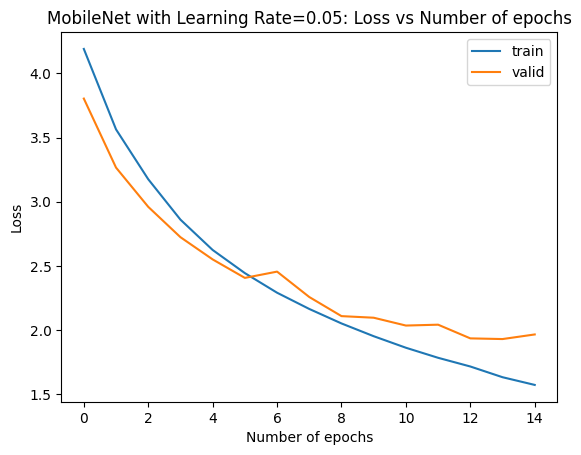

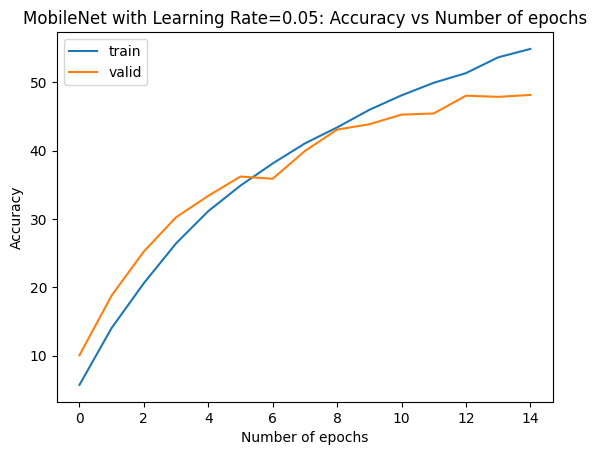

Running experiment with learning rate: 0.01
Epoch [1/15], Train Loss: 4.1443, Train Acc: 6.02%, Valid Loss: 3.7048, Valid Acc: 11.96%
Epoch [2/15], Train Loss: 3.5143, Train Acc: 15.34%, Valid Loss: 3.2771, Valid Acc: 18.72%
Epoch [3/15], Train Loss: 3.2079, Train Acc: 20.74%, Valid Loss: 3.0401, Valid Acc: 23.34%
Epoch [4/15], Train Loss: 2.9750, Train Acc: 24.87%, Valid Loss: 2.9498, Valid Acc: 26.45%
Epoch [5/15], Train Loss: 2.7622, Train Acc: 28.97%, Valid Loss: 2.6296, Valid Acc: 32.19%
Epoch [6/15], Train Loss: 2.5653, Train Acc: 33.08%, Valid Loss: 2.4780, Valid Acc: 35.94%
Epoch [7/15], Train Loss: 2.4050, Train Acc: 36.43%, Valid Loss: 2.3821, Valid Acc: 37.38%
Epoch [8/15], Train Loss: 2.2858, Train Acc: 38.99%, Valid Loss: 2.2840, Valid Acc: 39.72%
Epoch [9/15], Train Loss: 2.1685, Train Acc: 41.35%, Valid Loss: 2.2430, Valid Acc: 41.00%
Epoch [10/15], Train Loss: 2.0723, Train Acc: 43.80%, Valid Loss: 2.1778, Valid Acc: 42.26%
Epoch [11/15], Train Loss: 1.9810, Train Acc: 

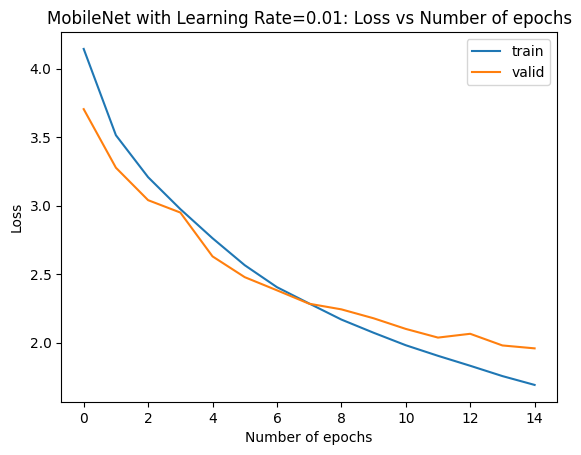

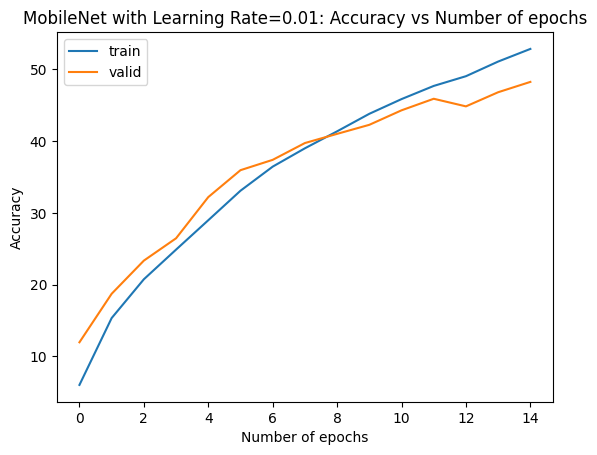

In [3]:
# prompt:  Run three experiments with the learning rate set to 0.2, 0.05, and 0.01 respectively. The batch size should be set to 128.  Train the networks for 15 epochs under
# each setting.  You should draw the following diagrams: (1) training loss and validation loss against the number of epochs, and (2) training accuracy and validation accuracy against the number of epochs.
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


import matplotlib.pyplot as plt

# Hyperparameters
num_epochs = 15
batch_size = 128
learning_rates = [0.2, 0.05, 0.01]
momentum = 0.9
data_dir = './data'

train_loader, valid_loader = get_train_valid_loader(data_dir=data_dir,batch_size=batch_size,augment=True,random_seed=42, num_workers=2)
test_loader = get_test_loader(data_dir=data_dir, batch_size=batch_size)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# MobileNet model
model = MobileNet(num_classes=100).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()

learning_curves = {}

for learning_rate in learning_rates:
    print(f"Running experiment with learning rate: {learning_rate}")
    model = MobileNet(num_classes=100).to(device)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []

    for epoch in range(num_epochs):
        # Train the model
        train_loss, train_accuracy = train_func(model, optimizer, criterion, train_loader, device, epoch)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Evaluate the model on the validation set
        valid_loss, valid_accuracy = eval(model, criterion, test_loader, device)
        valid_losses.append(valid_loss)
        valid_accuracies.append(valid_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], "
            f"Train Loss: {train_loss:.4f}, "
            f"Train Acc: {train_accuracy:.2f}%, "
            f"Valid Loss: {valid_loss:.4f}, "
            f"Valid Acc: {valid_accuracy:.2f}%")


    plt.plot(range(len(train_losses)), train_losses)
    plt.plot(range(len(valid_losses)), valid_losses)
    plt.xlabel("Number of epochs")
    plt.ylabel("Loss")
    plt.title(f"MobileNet with Learning Rate={learning_rate}: Loss vs Number of epochs")
    plt.legend(['train', 'valid'])
    plt.savefig(f'images/{learning_rate}_loss.png')
    plt.show()


    plt.plot(range(len(train_accuracies)), train_accuracies)
    plt.plot(range(len(valid_accuracies)), valid_accuracies)
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.title(f"MobileNet with Learning Rate={learning_rate}: Accuracy vs Number of epochs")
    plt.legend(['train', 'valid'])
    plt.savefig(f'images/{learning_rate}_accuracy.png')
    plt.show()

    learning_curves[learning_rate] = {    
                                        "train_losses": train_losses,
                                        "valid_losses": valid_losses,
                                        "train_accuracies": train_accuracies,
                                        "valid_accuracies": valid_accuracies
                                    }
    
import json

with open('learning_curves.json', 'w') as fp:
    json.dump(learning_curves, fp)